In [48]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import os.path as osp
import sys
sys.path.insert(0, osp.abspath(".."))
from utils import *
import seaborn as sns
from dataloader import *
import pandas as pd

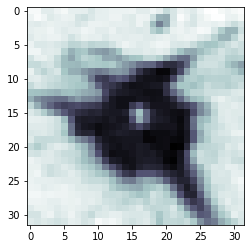

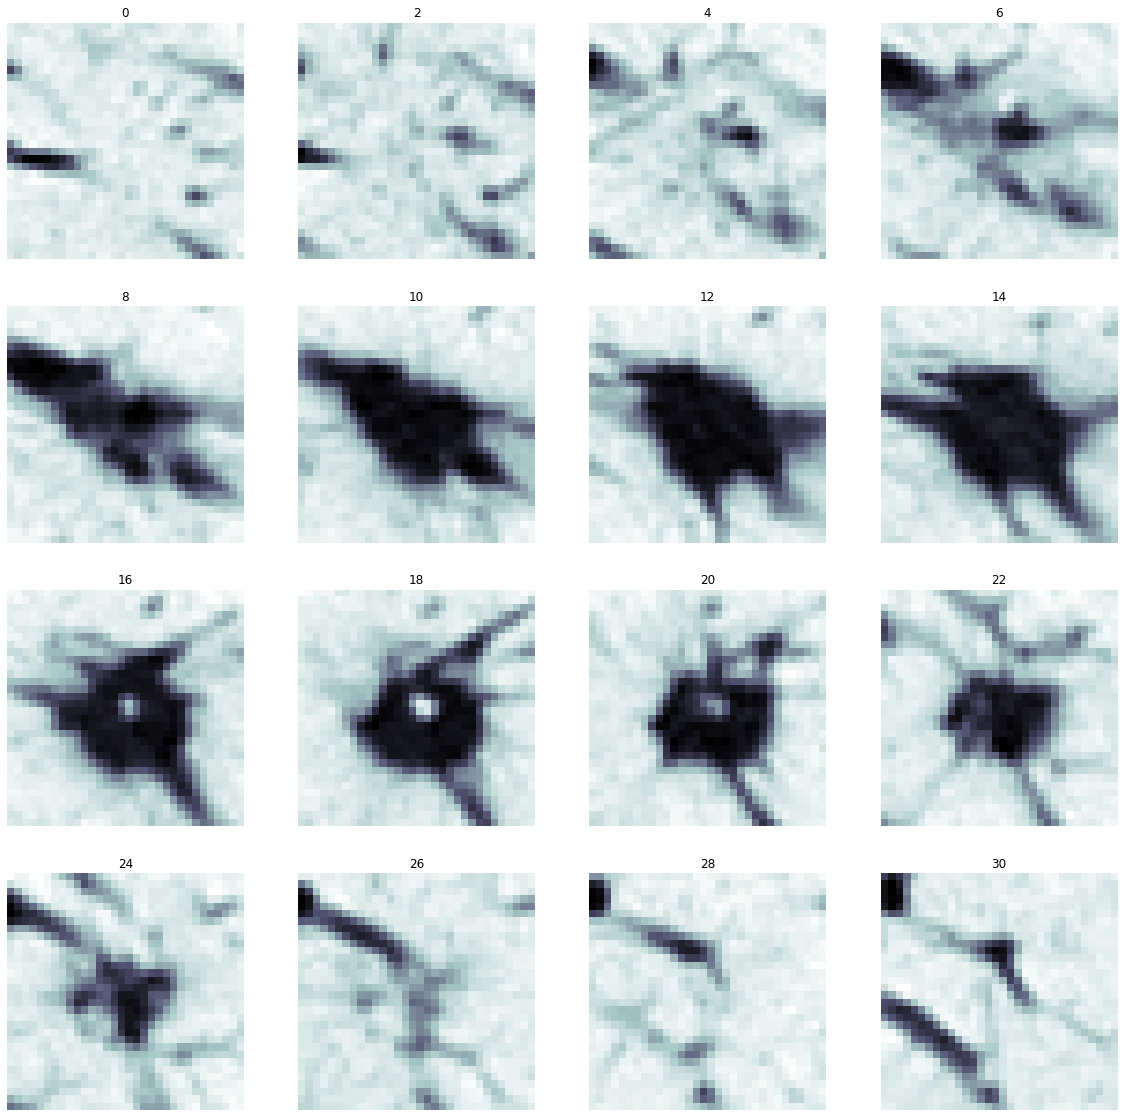

In [40]:
file_path = "/home/hthieu/data/crop/1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149938600000570588203-9-9-9-9-9-9-9-9-9-9-9-9.npy"
nod_npy   = np.load(file_path)
plt.figure(figsize=(4,4))
ax  = plt.gca()
ax.imshow(nod_npy[15,:,:], cmap="bone")
plot_slices(nod_npy[::-1,:,:], 0)

In [36]:
feat = np.load("../log/infer-multi-views-expr-4/deep-feat-1.npy")
pred = np.load("../log/infer-multi-views-expr-4/preds-1.npy")
pred_lbl = np.argmax(pred, axis=1)

In [65]:
test_fold = 1
teidlst = []
with open(osp.join("../subsets", "subset{}.txt".format(str(test_fold)))) as fo:
    teidlst += [i.strip() for i in fo.readlines()]
gts = []
nod_ids = []
for sid, gt in zip(df['seriesuid'].tolist()[1:], df['malignant'].tolist()[1:]):
    if sid.split('-')[0] in teidlst:
        gts.append(int(gt))
        nod_ids.append(sid)
gts = np.array(gts)
nod_ids = np.array(nod_ids)

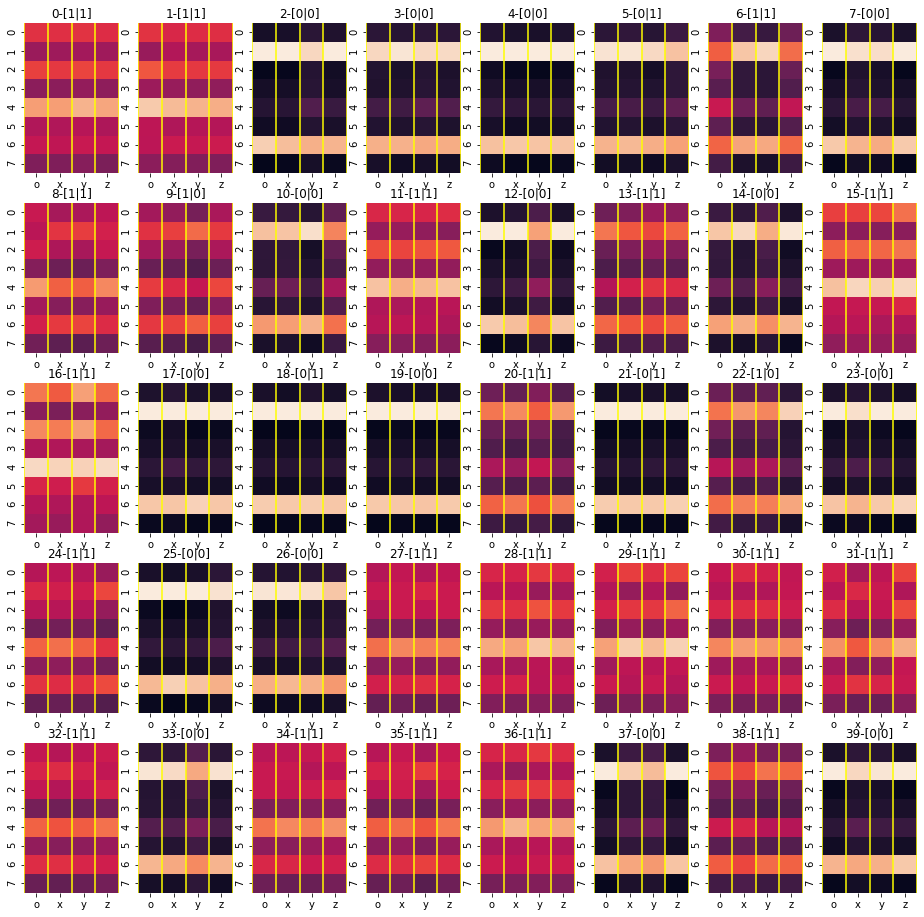

In [89]:
def plot_feature_vector(ax, idx):
    sns.heatmap(feat[:,idx,:].T, ax = ax,
                    vmin =0, vmax=2.5, cbar=False)
    ax.set_title("%d-[%d|%d]" %(idx, pred_lbl[idx], gts[idx]))
    ax.set_xticklabels(["o", "x", "y","z"])
    ax.vlines(np.arange(5), *ax.get_ylim(), color="yellow")

n_rows = 5
n_cols=8
fig, axs = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(16,16))
for i in range(n_rows):
    for j in range(n_cols):
        idx = (i * n_cols +j)
        plot_feature_vector(axs[i,j], idx)

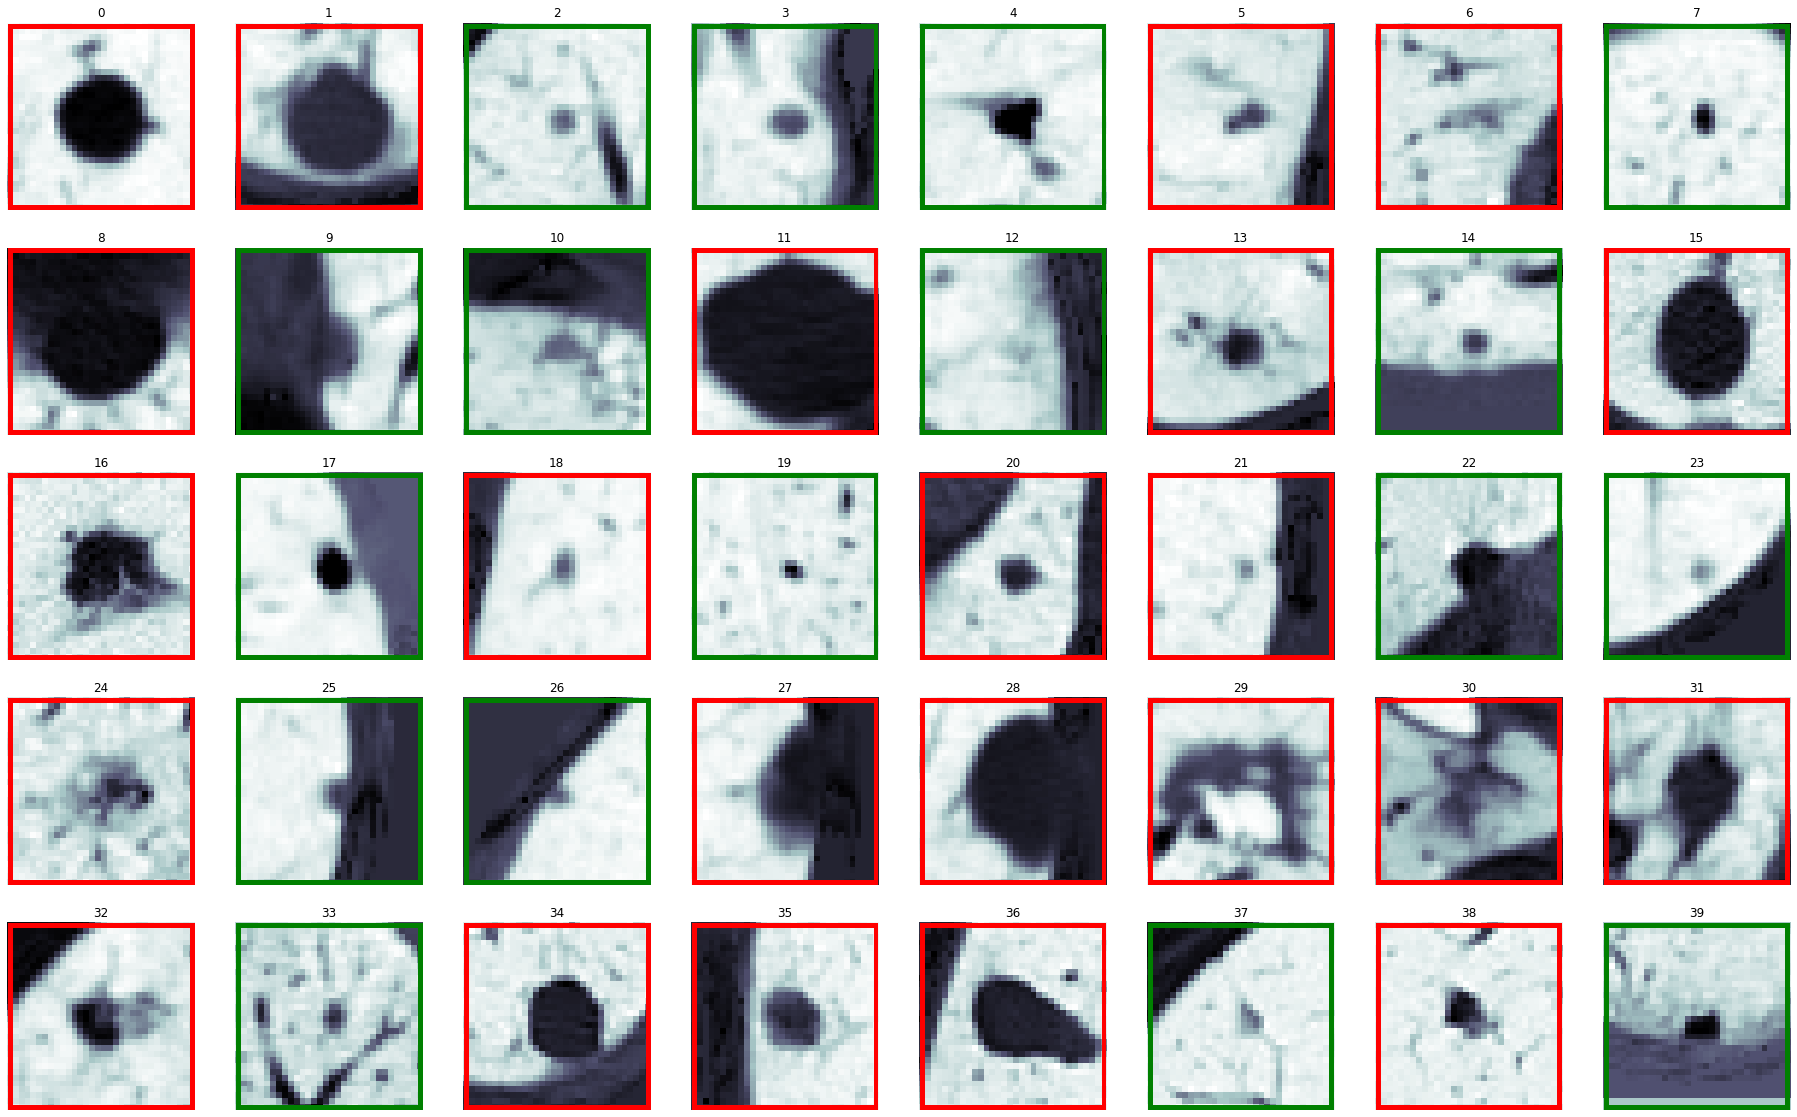

In [83]:
def plot_nodules(nods_lst, gts_lst, viz_lst, nrows=5, ncols=8, img_dir = "/home/hthieu/data/crop/"):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols *4,nrows *4))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = (i * n_cols +j)
            if idx >= len(viz_lst):
                return
            nod_npy   = np.load(osp.join(img_dir, nods_lst[viz_lst[idx]]+".npy"))
            col = "red" if gts_lst[viz_lst[idx]] == 1 else "green"
            axs[i][j].add_patch(patches.Rectangle((0,0),31, 31,linewidth=5, edgecolor=col, facecolor='none'))
            axs[i][j].imshow(nod_npy[15,:,:], cmap = "bone")
            axs[i][j].axis("off")
            axs[i][j].set_title(str(viz_lst[idx]))
plot_nodules(nod_ids, gts, np.arange(40))

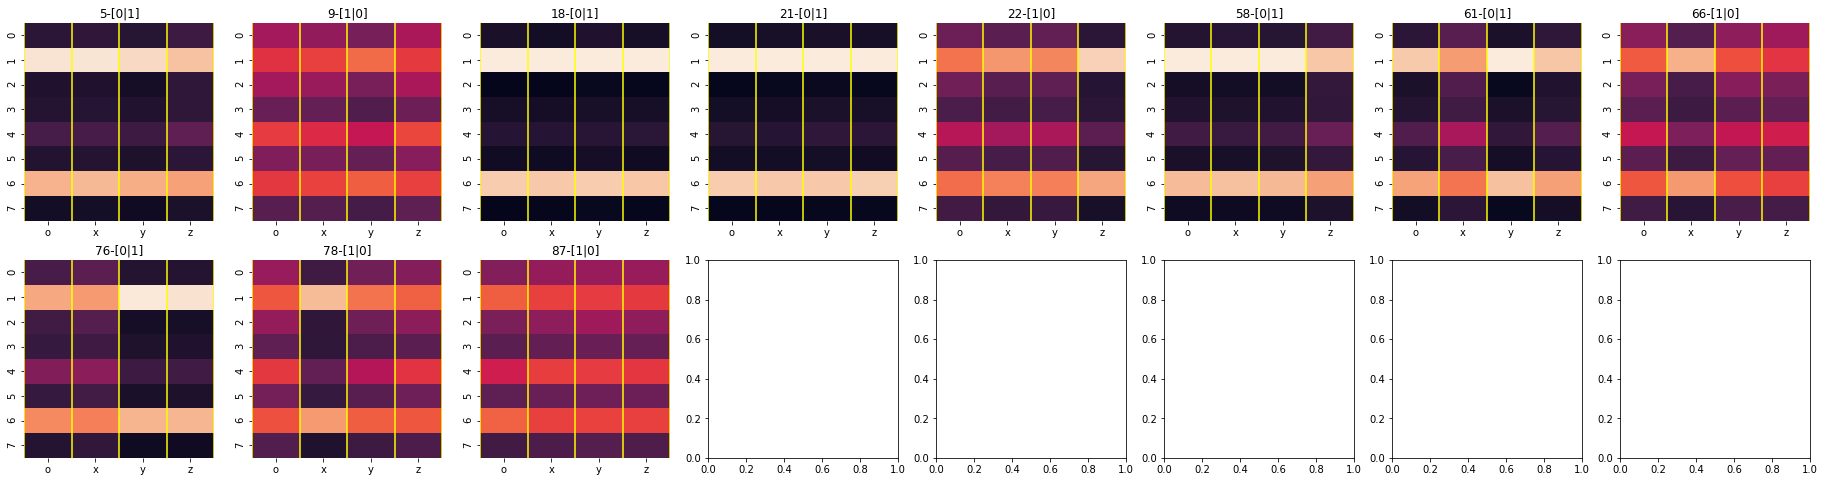

In [90]:
def plot_imgs_grid(viz_func, viz_lst, nrows=2, ncols=8):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols *4,nrows *4))
    for i in range(n_rows):
        for j in range(n_cols):
            idx = (i * n_cols +j)
            if idx >= len(viz_lst):
                return
            viz_func(axs[i,j], viz_lst[idx])
plot_imgs_grid(plot_feature_vector, incorrect_preds)

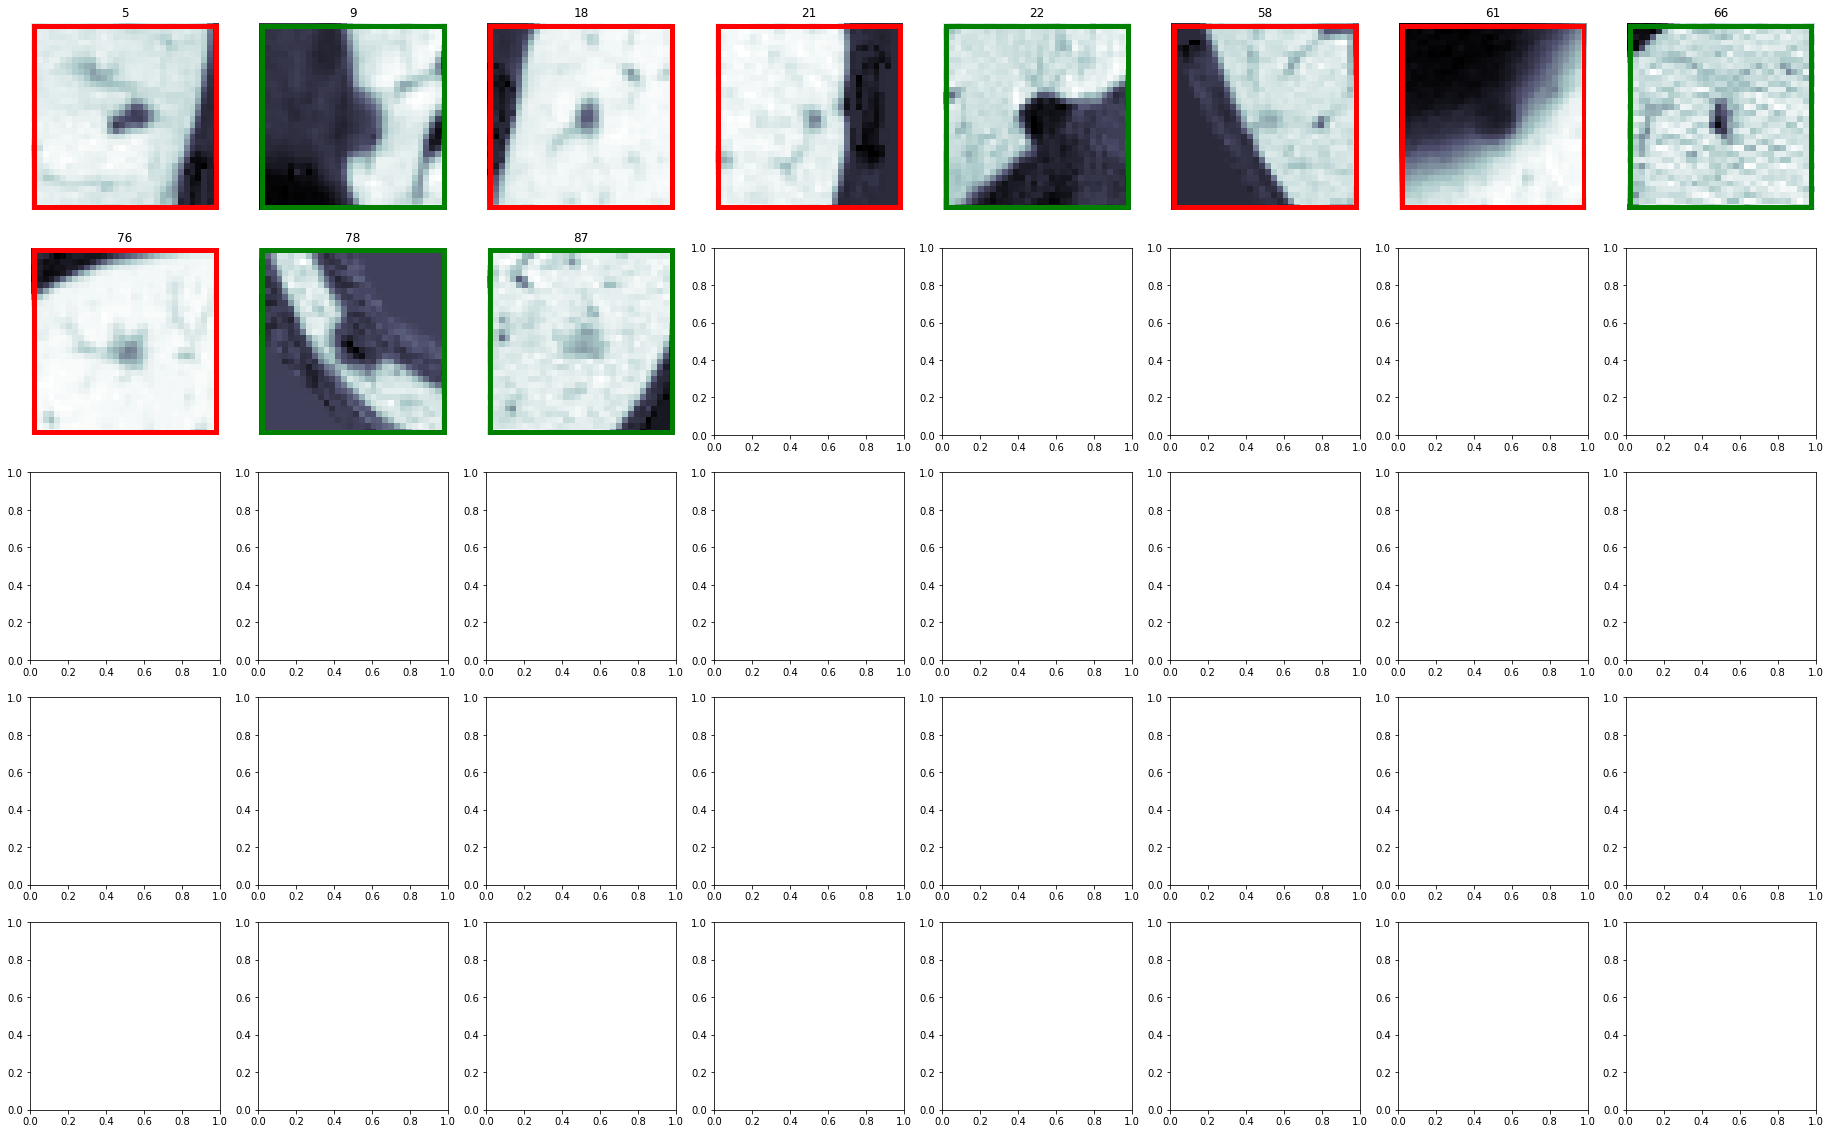

In [84]:
incorrect_preds = np.where(pred_lbl != gts)[0]
plot_nodules(nod_ids, gts, incorrect_preds)

# len(pred_lbl)